In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pylab  as plt 
from sklearn import datasets

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [9]:
train_images[0].shape

(28, 28)

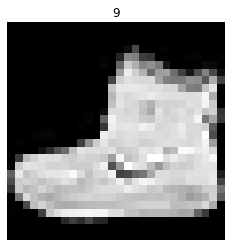

In [14]:
plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])
plt.axis('off')
plt.show()

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [17]:
len(class_names)

10

In [116]:
model_mark2 = tf.keras.models.Sequential([
    # 전처리 얘기는 없었으니 생략 
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])


model_mark2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [117]:
model_mark2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
Total params: 111,344
Trainable params: 111,344
Non-trainable params: 0
_________________________________________________________________


In [118]:
model_mark2_data = model_mark2.fit(train_images, train_labels, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 4.0521 - accuracy: 0.6382 - val_loss: 0.6022 - val_accuracy: 0.7860
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5602 - accuracy: 0.7984 - val_loss: 0.5127 - val_accuracy: 0.8190
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4752 - accuracy: 0.8345 - val_loss: 0.4843 - val_accuracy: 0.8351
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4389 - accuracy: 0.8438 - val_loss: 0.4506 - val_accuracy: 0.8445
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4034 - accuracy: 0.8549 - val_loss: 0.4418 - val_accuracy: 0.8460
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4029 - accuracy: 0.8560 - val_loss: 0.4306 - val_accuracy: 0.8528
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3807 - accuracy: 0.8624 - val_loss: 0.3966 - val_accuracy:

In [119]:
pd.DataFrame(model_mark2_data.history)

,loss,accuracy,val_loss,val_accuracy
0,1.417971,0.719958,0.602214,0.786000
1,0.542281,0.807437,0.512708,0.819000
2,0.474633,0.833667,0.484321,0.835083
3,0.431903,0.845021,0.450572,0.844500
4,0.408934,0.853000,0.441793,0.846000
5,0.388981,0.860042,0.430626,0.852750
6,0.378807,0.864563,0.396625,0.862667
7,0.361502,0.869917,0.407941,0.865583
8,0.351283,0.873812,0.394104,0.858583
9,0.341961,0.877167,0.383566,0.869917


In [167]:
pd.DataFrame(model_data.history)

,loss,accuracy,val_loss,val_accuracy
0,0.413153,0.856208,0.604964,0.830417
1,0.414684,0.859917,0.635963,0.835167
2,0.403188,0.862125,0.647567,0.830250
3,0.410480,0.859625,0.645143,0.839833
4,0.411282,0.859521,0.667830,0.815500
...,...,...,...,...
95,0.406841,0.862167,0.828544,0.823500
96,0.417963,0.858458,0.887670,0.821167
97,0.404524,0.865000,0.845992,0.828917
98,0.394027,0.862208,0.835173,0.825583


In [160]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0405 - accuracy: 0.8247


In [161]:
predictions = model.predict(test_images)

In [162]:
np.argmax(predictions[20])

6

In [164]:
class_names[6]

'Shirt'

In [128]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Text(0.5, 1.0, 'Pullover')

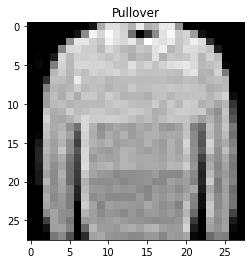

In [165]:
plt.imshow(test_images[20], cmap='gray')
plt.title(class_names[test_labels[20]])

1번 :  Pullover / 2번 :  Trouser / 3번 :  Trouser / 4번 :  T-shirt/top / 5번 :  Trouser / 6번 :  Coat / 7번 :  Shirt / 8번 :  Sandal / 9번 :  Sneaker / 10번 :  Coat / 11번 :  Sandal / 12번 :  Sandal / 13번 :  Dress / 14번 :  Coat / 15번 :  Trouser / 16번 :  Pullover / 17번 :  Pullover / 18번 :  Bag / 19번 :  T-shirt/top / 20번 :  Shirt / 

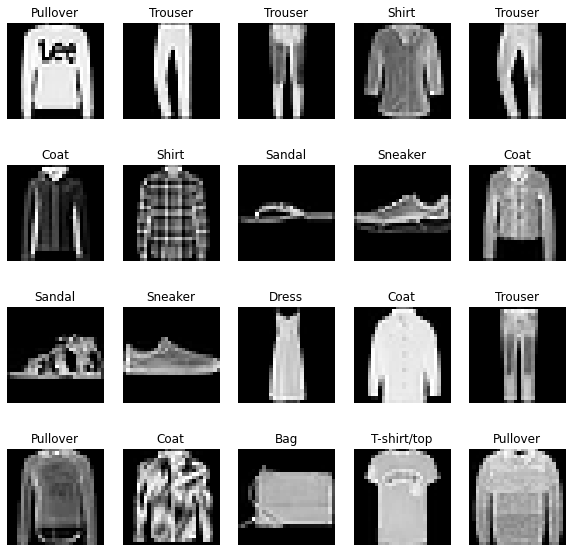

In [166]:
plt.figure(figsize=(10,10))
for i in range(1,21):
    print('{}번 : '.format(i), class_names[np.argmax(predictions[i])], '/', end=' ')

    plt.subplot(4,5,i)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(class_names[test_labels[i]])
    plt.axis('off')


In [144]:
for i in range(1,20):
    print(i, end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [57]:
predictions[9599].shape

(10,)

In [61]:
test_images[0].shape

(28, 28)

In [56]:
test_images[0].shape

(28, 28)